In [1]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
anyio                        3.6.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.8
astunparse                   1.6.3
async-generator              1.10
attrs                        22.1.0
Babel                        2.10.3
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.2.0
certifi                      2022.6.15
cffi                         1.15.1
charset-normalizer           2.1.1
colorama                     0.4.5
cryptography                 37.0.4
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
et-xmlfile                   1.1.0
executing                    1.0.0
fastjsonschema               2.16.1
fl

In [3]:
# !-m pip install --upgrade pip

In [4]:
import tensorflow as tf
import os # to navigate to files

In [5]:
# Avoid OOM(Out of memory) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
gpus

[]

In [7]:
tf.config.list_physical_devices("GPU")

[]

## Remove Dodgy images

In [8]:
import cv2
import imghdr

In [9]:
data_dir = 'data' 


In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

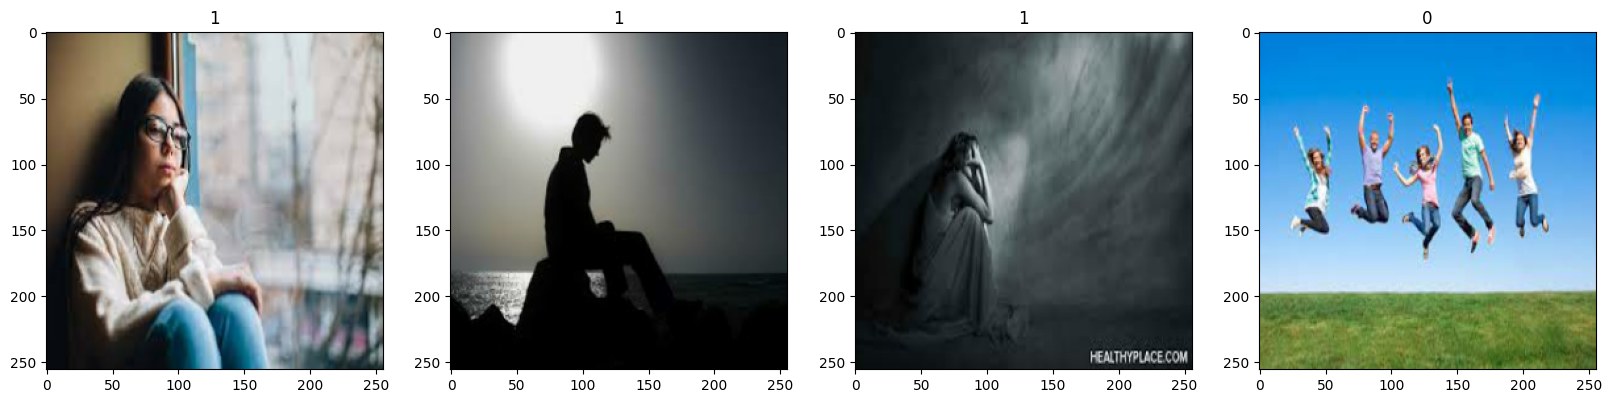

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [18]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.06666667, 0.07058824, 0.14117648],
          [0.06666

## Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

7

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model

In [22]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train

In [28]:
logdir = 'logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 12s 1s/step - loss: 0.9505 - accuracy: 0.5223 - val_loss: 0.6735 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6644 - accuracy: 0.6116 - val_loss: 0.6231 - val_accuracy: 0.8281
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.5867 - accuracy: 0.7812 - val_loss: 0.4961 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.4556 - accuracy: 0.8170 - val_loss: 0.4118 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.3690 - accuracy: 0.8705 - val_loss: 0.2420 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.3313 - accuracy: 0.8571 - val_loss: 0.2275 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.2502 - accuracy: 0.9286 - val_loss: 0.1572 - val_accuracy: 0.9375
Epoch 8/20
7/7 [==================

## Plotting Performance

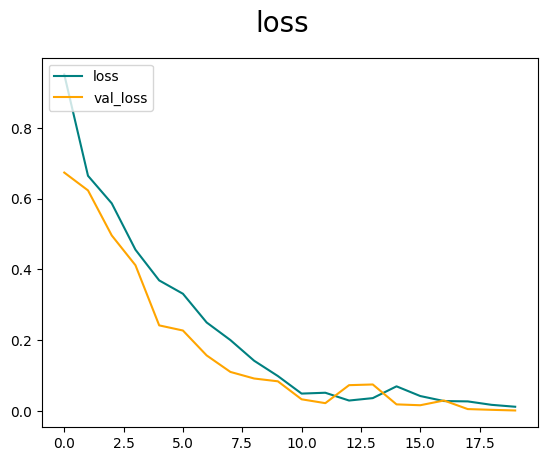

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

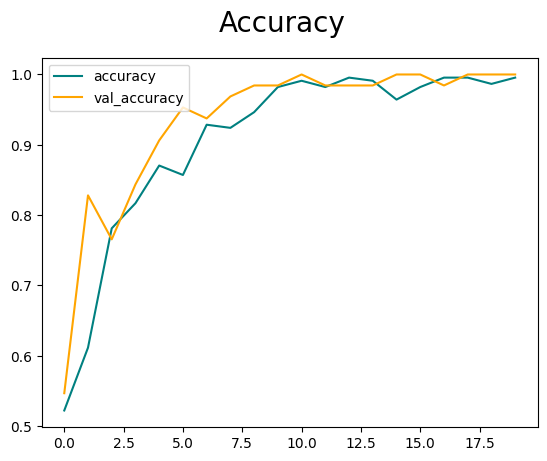

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [35]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 195ms/step


## Test

In [36]:
import cv2

In [37]:
import cv2

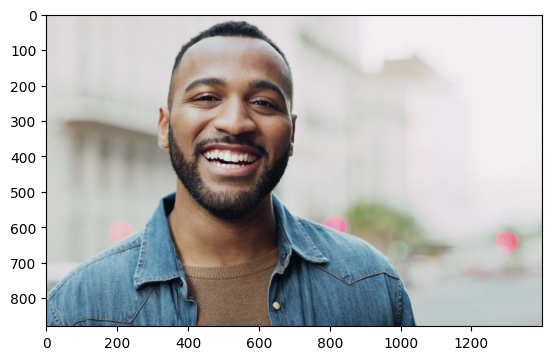

In [44]:
import cv2
img = plt.imread(r"C:\Users\HP\Desktop\Image Identifier\data\happy\05-12-21-happy-people.jpg")
plt.imshow(img)
plt.show()

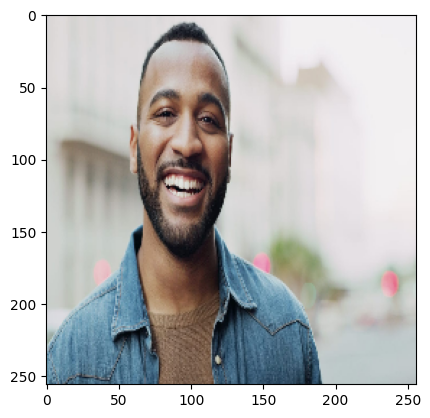

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


In [47]:
yhat

array([[0.00132545]], dtype=float32)

In [48]:
if yhat > 0.5:
    print(f"Predicted class is Sad")
else:
    print(f"Predicted class is Happy")

Predicted class is Happy


## Save the Model

In [49]:
from tensorflow.keras.models import load_model


In [52]:
model.save(os.path.join('models', 'imageclassifier.h5'))

In [55]:
new_model = load_model(r'C:\Users\HP\Desktop\Image Identifier\models\imageclassifier.h5')

In [56]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 82ms/step


array([[0.00132545]], dtype=float32)